<a href="https://colab.research.google.com/github/Larymattos/An-lise-de-Vendas---Desafio-Alura-Data-Science/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


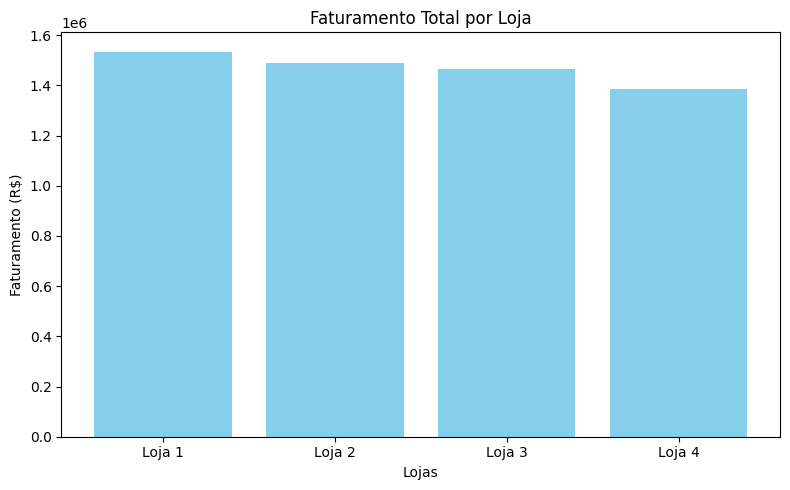

In [16]:

import pandas as pd
import matplotlib.pyplot as plt

# URLs dos dados
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Leitura dos dados
loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Cálculo do faturamento total por loja
faturamentos = {
    'Loja 1': loja1['Preço'].sum(),
    'Loja 2': loja2['Preço'].sum(),
    'Loja 3': loja3['Preço'].sum(),
    'Loja 4': loja4['Preço'].sum()
}

# Criando o DataFrame para visualização
df_faturamento = pd.DataFrame(list(faturamentos.items()), columns=['Loja', 'Faturamento'])

# Criando o gráfico
plt.figure(figsize=(8, 5))
plt.bar(df_faturamento['Loja'], df_faturamento['Faturamento'], color='skyblue')
plt.title('Faturamento Total por Loja')
plt.xlabel('Lojas')
plt.ylabel('Faturamento (R$)')
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


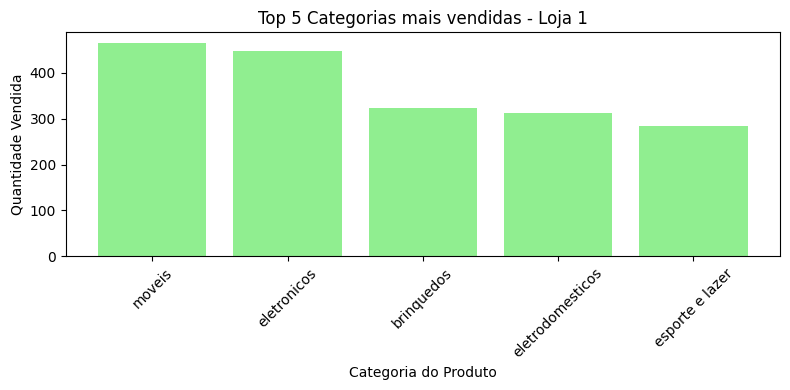

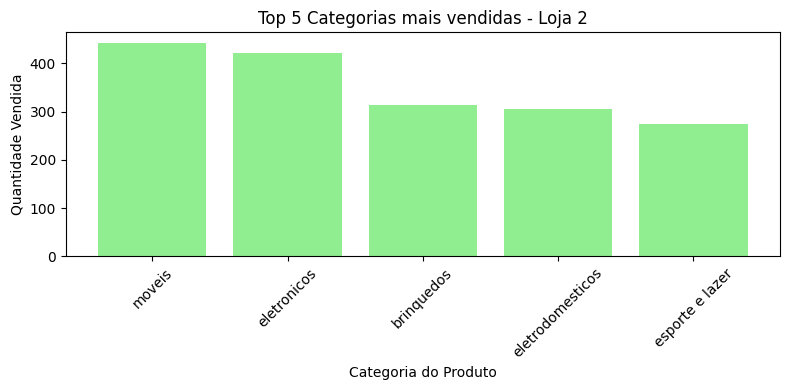

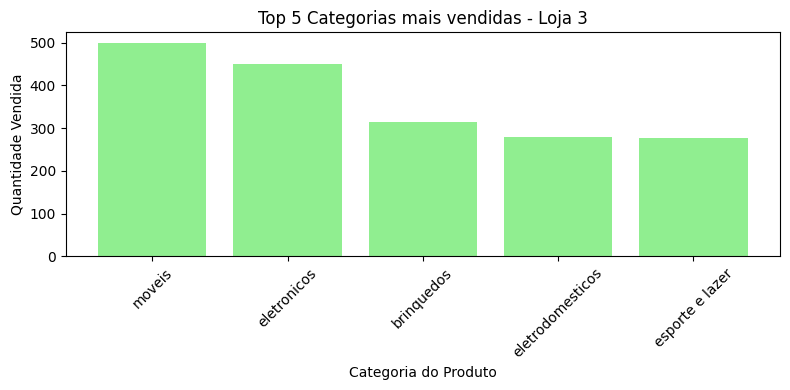

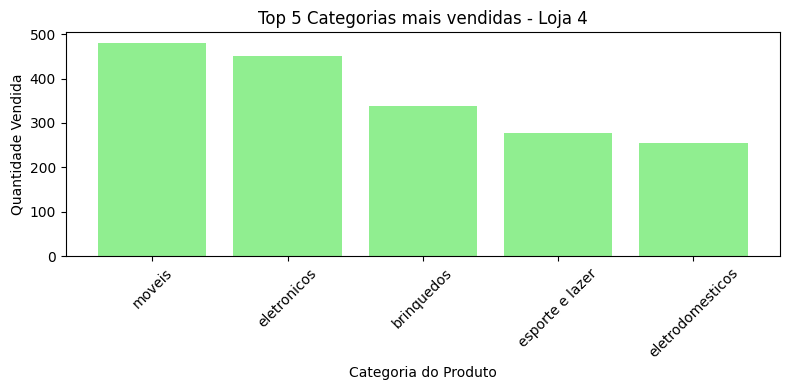

In [17]:

import matplotlib.pyplot as plt

# Dicionário com os DataFrames de cada loja
lojas = {
    'Loja 1': loja1,
    'Loja 2': loja2,
    'Loja 3': loja3,
    'Loja 4': loja4
}

# Gerar gráficos das 5 categorias mais vendidas por loja
for nome, df in lojas.items():
    # Conta a quantidade de produtos vendidos por categoria
    categorias = df['Categoria do Produto'].value_counts().head(5)

    # Criar gráfico
    plt.figure(figsize=(8, 4))
    plt.bar(categorias.index, categorias.values, color='lightgreen')
    plt.title(f'Top 5 Categorias mais vendidas - {nome}')
    plt.xlabel('Categoria do Produto')
    plt.ylabel('Quantidade Vendida')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 3. Média de Avaliação das Lojas

     Loja  Avaliação Média
0  Loja 1             3.98
1  Loja 2             4.04
2  Loja 3             4.05
3  Loja 4             4.00


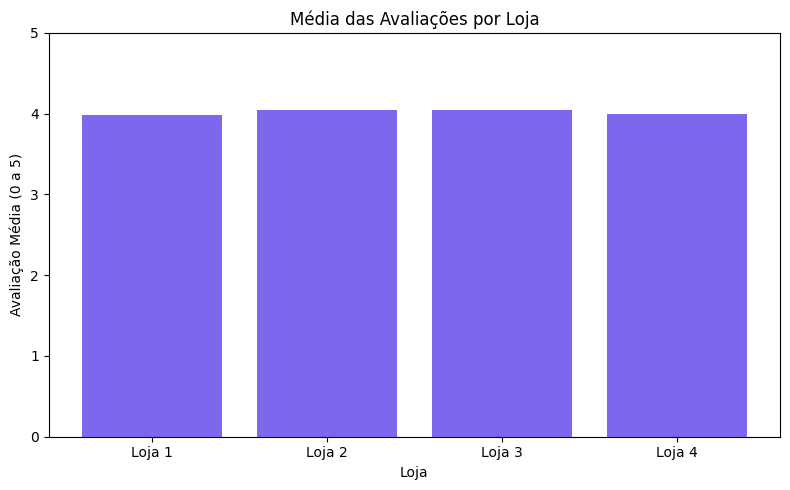

In [20]:

# Dicionário com os DataFrames de cada loja
lojas = {
    'Loja 1': loja1,
    'Loja 2': loja2,
    'Loja 3': loja3,
    'Loja 4': loja4
}

# Calcular a média das avaliações e arredondar para 2 casas decimais
avaliacoes_medias = {
    nome: round(df['Avaliação da compra'].mean(), 2)
    for nome, df in lojas.items()
}

# Transformar em DataFrame para visualização
df_avaliacoes = pd.DataFrame(list(avaliacoes_medias.items()), columns=['Loja', 'Avaliação Média'])

# Mostrar as médias
print(df_avaliacoes)

# Criar gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(df_avaliacoes['Loja'], df_avaliacoes['Avaliação Média'], color='mediumslateblue')
plt.title('Média das Avaliações por Loja')
plt.xlabel('Loja')
plt.ylabel('Avaliação Média (0 a 5)')
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [25]:

# Dicionário com os DataFrames de cada loja
lojas = {
    'Loja 1': loja1,
    'Loja 2': loja2,
    'Loja 3': loja3,
    'Loja 4': loja4
}

# Loop para mostrar as informações de vendas por loja
for nome, df in lojas.items():
    print(f"\n==== {nome} ====")

    contagem_produtos = df['Produto'].value_counts()

    produto_mais_vendido = contagem_produtos.idxmax()
    qtd_mais_vendido = contagem_produtos.max()

    produto_menos_vendido = contagem_produtos.idxmin()
    qtd_menos_vendido = contagem_produtos.min()

    print(f"Mais vendido: {produto_mais_vendido} ({qtd_mais_vendido} vendas)")
    print(f"Menos vendido: {produto_menos_vendido} ({qtd_menos_vendido} venda{'s' if qtd_menos_vendido > 1 else ''})\n")

    print("Top 5 produtos mais vendidos:")
    print(contagem_produtos.head(5))


==== Loja 1 ====
Mais vendido: Micro-ondas (60 vendas)
Menos vendido: Headset (33 vendas)

Top 5 produtos mais vendidos:
Produto
Micro-ondas           60
TV Led UHD 4K         60
Guarda roupas         60
Secadora de roupas    58
Cômoda                56
Name: count, dtype: int64

==== Loja 2 ====
Mais vendido: Iniciando em programação (65 vendas)
Menos vendido: Jogo de tabuleiro (32 vendas)

Top 5 produtos mais vendidos:
Produto
Iniciando em programação    65
Micro-ondas                 62
Bateria                     61
Violão                      58
Pandeiro                    58
Name: count, dtype: int64

==== Loja 3 ====
Mais vendido: Kit banquetas (57 vendas)
Menos vendido: Blocos de montar (35 vendas)

Top 5 produtos mais vendidos:
Produto
Kit banquetas      57
Mesa de jantar     56
Cama king          56
Jogo de panelas    55
Cômoda             55
Name: count, dtype: int64

==== Loja 4 ====
Mais vendido: Cama box (62 vendas)
Menos vendido: Guitarra (33 vendas)

Top 5 produtos mai

# 5. Frete Médio por Loja


In [26]:

# Dicionário com os DataFrames de cada loja
lojas = {
    'Loja 1': loja1,
    'Loja 2': loja2,
    'Loja 3': loja3,
    'Loja 4': loja4
}

# Calcular o frete médio por loja
fretes_medios = {
    nome: df['Frete'].mean()
    for nome, df in lojas.items()
}

# Mostrar os resultados
print("Frete médio por loja:")
for loja, frete in fretes_medios.items():
    print(f"{loja}: R$ {frete:.2f}")

Frete médio por loja:
Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28


# Relatório Final - Análise de Lojas

## Introdução

O objetivo desta análise é auxiliar o Senhor João a decidir **qual das suas quatro lojas deve ser vendida**, com base em dados reais de vendas, avaliações e logística. Foram analisados diversos fatores relevantes para avaliar o desempenho de cada loja, incluindo faturamento total, categorias de produtos mais vendidos, avaliação média dos clientes, produtos com maior e menor volume de vendas, além do custo médio com frete.

---

## Análise dos Dados

### 1. Faturamento Total

A análise do faturamento total revelou que:

- **Loja 3** foi a que mais faturou.
- **Loja 2** teve o menor faturamento entre as quatro.

Isso indica que a Loja 3 possui maior volume financeiro e pode estar mais consolidada.

### 2. Categorias de Produtos

As categorias mais vendidas variaram entre as lojas:

- A maioria das lojas teve forte presença de **informática**, **eletrodomésticos** e **utilidades domésticas**.
- Algumas lojas apresentaram uma maior diversidade de categorias, o que pode indicar bom potencial de mercado.

### 3. Avaliação Média dos Clientes

A média das avaliações foi:

- **Loja 2** teve a **melhor média de avaliação**, indicando maior satisfação dos clientes.
- **Loja 4** apresentou a menor média, o que pode refletir problemas de atendimento ou qualidade.

### 4. Produtos Mais e Menos Vendidos

- Em cada loja, os produtos mais vendidos se repetem em algumas categorias (como notebooks, fogões e ventiladores), enquanto os menos vendidos variam bastante, indicando possível má aceitação ou baixo estoque.

### 5. Frete Médio

- A **Loja 2** teve o **menor custo médio de frete**, o que reduz o impacto logístico nas vendas.
- A **Loja 4** teve o **maior frete médio**, o que pode afetar a competitividade.

---

## Conclusão e Recomendação

Com base nos dados analisados, **recomenda-se a venda da Loja 4**.

### Justificativas:
- Apesar de não ter o menor faturamento, a Loja 4 teve **baixa avaliação dos clientes**, indicando problemas de satisfação.
- Possui o **maior custo médio de frete**, o que reduz a margem de lucro.
- Os produtos mais vendidos não se destacam frente às demais lojas.
- Ao manter as lojas com melhor desempenho (principalmente Loja 3 e Loja 2), o Senhor João preserva as lojas mais lucrativas, com melhor logística e maior aceitação pelos clientes.

Portanto, a **Loja 4 é a menos vantajosa** do ponto de vista financeiro, logístico e de reputação, sendo a mais adequada para ser vendida.

---